## 第七章-PAC与梯度上升法

### 7-1 什么是PCA?

主成分分析法 `Principal Component Analysis`

- 一个非监督的机器学习算法
- 主要用于数据的降维
- 通过降维, 可以发现更便于人理解的特征
- 其他应用: 可视化, 降噪

![](./picture/7-1-1.png)

![](./picture/7-1-2.png)

<font face="Courier New">

目标: **找到一条使得样本间间距最大的轴**<br>
使用方差(`Variance`)定义样本间的间距, $Var(x) = \frac{1}{m}\sum^{m}_{i=1}(x_{i} - \overline{x})^{2}$<br>
方差:描述样本整体分布的疏密的指标, 方差越大, 样本间越稀疏, 方差越小样本间越紧密, 因此, 目标转化为**找到使得样本最大方差**

![](picture/7-1-3.png)

<font face="Courier New">

$Var(x) = \frac{1}{m}\sum^{m}_{i=1}(x_{i} - \overline{x})^{2}$;其中 $\overline{x}=0$; 则: $Var(x) = \frac{1}{m}\sum^{m}_{i=1}x_{i}^{2}$

<font face="Courier New">

对所有的样本进行 `demean` 处理, 我们想要求一个轴的方向 `w = (w1, w2)`, 使得我们所有的样本, 映射到 w 以后, 得到: $$Var(X_{project}) = \frac{1}{m}\sum^{m}_{i=1}(X_{project}^{(i)} - \overline{X}_{project})^{2} ;其中X_{project}为映射后的样本.$$
$$Var(X_{project}) = \frac{1}{m}\sum^{m}_{i=1}||X_{project}^{(i)} - \overline{X}_{project}||^{2}$$
$$Var(X_{project}) = \frac{1}{m}\sum^{m}_{i=1}||X_{project}^{(i)}||^{2}$$
使得上述最后一个式子结果最大

![](picture/7-1-4.png)

![](picture/7-1-5.png)

**主成分分析与线性回归区别**

![](picture/7-1-6.png)

![](picture/7-1-7.png)

### 7-2 使用梯度上升法求解PCA问题

![](picture/7-1-6.png)

![](picture/7-2-1.png)

### 7-3 求数据的主成分PCA

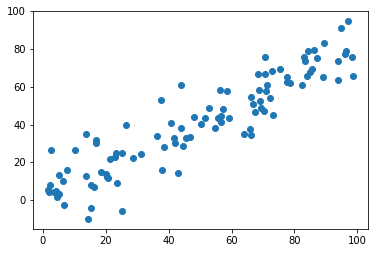

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0.0, 100.0, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3.0 + np.random.normal(0.0, 10.0, size=100)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### demean

In [48]:
def demean(X):
    return X - np.mean(X, axis=0)

**梯度上升法**

In [58]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [59]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2.0 / len(X)

In [60]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [61]:
def direction(w):
    return w / np.linalg.norm(w)  # 求 w 的模

def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)  # 注意1: 每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
    return w

In [62]:
initial_w = np.random.random(X.shape[1]) # 注意2: 不能用0向量开始
initial_w

array([0.55818242, 0.18638022])

In [63]:
eta = 0.001

In [64]:
X_demean = demean(X)

**注意3: 不能使用`StandardScaler`标准化数据**, 因为使用`StandardScaler`将数据进行归一化处理之后方差变为1, 不符合 PAC 算法样本方差最大化这一目的!

In [65]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.7660432, 0.6427891])

In [69]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

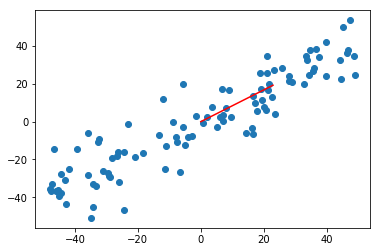

In [70]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*30], [0, w[1]*30], color="r")
plt.show()

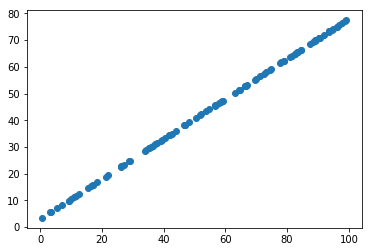

In [73]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0.0, 100.0, size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.0
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [77]:
X2_demean = demean(X2)

In [78]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

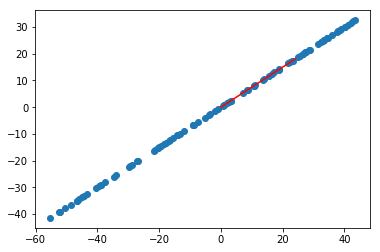

In [79]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color="r")
plt.show()

### 7-4 求数据的前n个主成分

![](picture/7-4-1.png)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [14]:
def demean(X):
    return X - np.mean(X, axis=0)

In [15]:
X = demean(X)

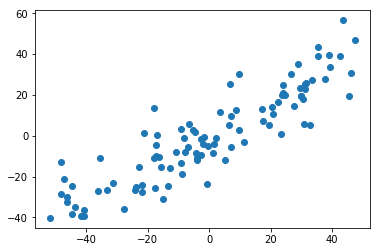

In [16]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [17]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) 
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [18]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.77121871, 0.63657026])

In [19]:
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

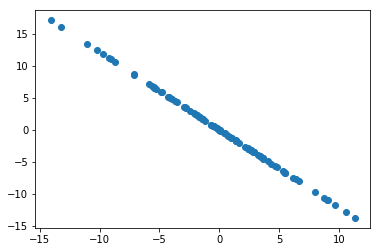

In [20]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [21]:
X2 = X - X.dot(w).reshape(-1, 1) * w

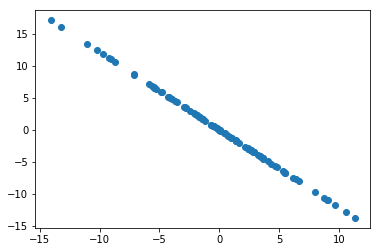

In [22]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [23]:
w2 = first_component(X2, initial_w, eta)
w2

array([-0.63656677,  0.77122159])

In [24]:
w.dot(w2)

4.520379219774551e-06

In [25]:
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [26]:
first_n_components(2, X)

[array([0.77121878, 0.63657018]), array([-0.63656685,  0.77122153])]

### 7-5 高纬度数据映射为低维数据

### 7-6 scikit-learn 中的 PCA

### 7-7试手MNIST数据集

### 7-8 使用PCA对数据进行降噪

### 7-9 人脸识别与特征脸